# Test All Pre-trained Models on IRIS Dataset
Load và đánh giá các model đã được huấn luyện sẵn trên tập test.

In [36]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

# Import các classifiers
from models.SoftMax import SoftMaxClassifier
from models.KNN import KNNClassifier
from models.Decision_Tree import DecisionTreeClassifier
from models.Naive_Bayes import GaussianNaiveBayesClassifier

# Đường dẫn
TEST_FILE = '../../data/IRIS_test.csv'
TRAIN_FILE = '../../data/IRIS_train.csv'

print("Import thành công!")

Import thành công!


## 1. Load Test Data

In [37]:
# Load test data
FEATURE_COLS = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
LABEL_COL = 'species'
CLASS_ORDER = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

df_test = pd.read_csv(TEST_FILE)
df_train = pd.read_csv(TRAIN_FILE)

X_test = df_test[FEATURE_COLS].values
y_test = df_test[LABEL_COL].values

X_train = df_train[FEATURE_COLS].values
y_train = df_train[LABEL_COL].values

# One-hot encoding cho SoftMax
def to_onehot(y_labels):
    y_onehot = np.zeros((len(y_labels), len(CLASS_ORDER)))
    for i, label in enumerate(y_labels):
        if label in CLASS_ORDER:
            y_onehot[i, CLASS_ORDER.index(label)] = 1.0
    return y_onehot

y_test_onehot = to_onehot(y_test)

print(f"Test samples: {len(X_test)}")
print(f"Train samples: {len(X_train)}")

Test samples: 30
Train samples: 120


## 2. Test SoftMax Model

In [38]:
# Load và test SoftMax model
softmax_clf = SoftMaxClassifier()
softmax_clf.load_model('../models/softmax_model.pkl')

softmax_acc, softmax_pred, _ = softmax_clf.evaluate(X_test, y_test_onehot)
print(f"\nSoftMax Accuracy: {softmax_acc:.2f}%")

[OK] Đã load model từ: ../models/softmax_model.pkl

SoftMax Accuracy: 93.33%


## 3. Test KNN Model

In [39]:
# Load và test KNN model
knn_clf = KNNClassifier()
knn_clf.load_model('../models/knn_model.pkl')

knn_acc, knn_pred, _ = knn_clf.evaluate(df_test)
print(f"\nKNN Accuracy: {knn_acc*100:.2f}%")

[OK] Đã load model từ: ../models/knn_model.pkl

Kết luận (KNN Weighted):
Best k: 3
Accuracy trên tập test: 0.9333

KNN Accuracy: 93.33%


## 4. Test Decision Tree Model

In [40]:
# Load và test Decision Tree model
dt_clf = DecisionTreeClassifier()
dt_clf.load_model('../models/decision_tree_model.pkl')

dt_acc, dt_pred, _ = dt_clf.evaluate(X_test, y_test)
print(f"\nDecision Tree Accuracy: {dt_acc*100:.2f}%")

[OK] Đã load model từ: ../models/decision_tree_model.pkl
Accuracy trên tập test: 0.9667

Decision Tree Accuracy: 96.67%


## 5. Test Naive Bayes Model

In [41]:
# Load và test Naive Bayes model
nb_clf = GaussianNaiveBayesClassifier()
nb_clf.load_model('../models/naive_bayes_model.pkl')

nb_acc, nb_pred, _ = nb_clf.evaluate(X_test, y_test)
print(f"\nNaive Bayes Accuracy: {nb_acc*100:.2f}%")

[OK] Đã load model từ: ../models/naive_bayes_model.pkl
Accuracy trên tập test: 0.9667

Naive Bayes Accuracy: 96.67%


## 6. So sánh kết quả các Models

        KẾT QUẢ SO SÁNH CÁC MODELS
        Model  Accuracy (%)
  Naive Bayes     96.666667
Decision Tree     96.666667
          KNN     93.333333
      SoftMax     93.333333


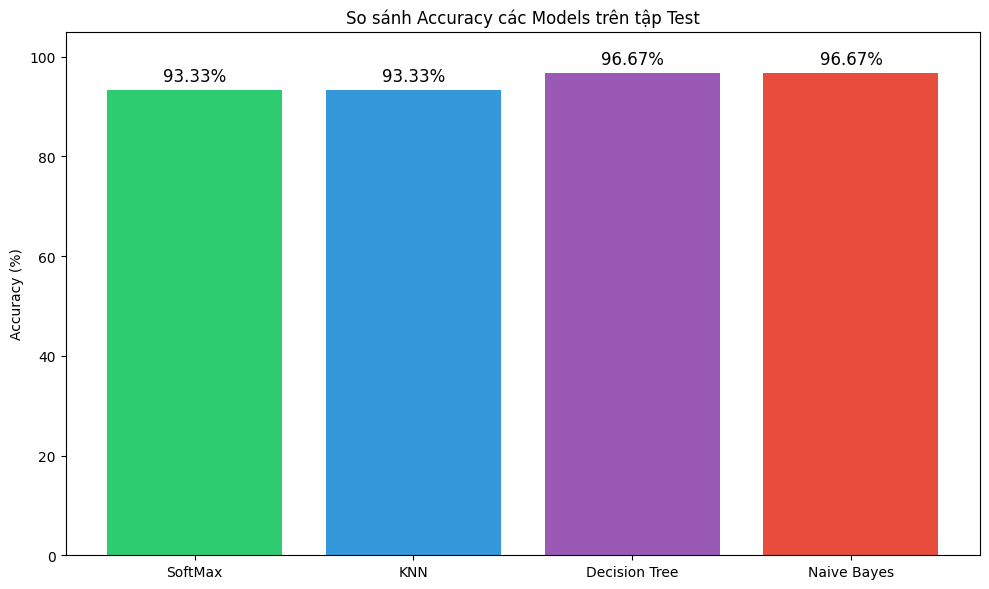

In [42]:
# So sánh tất cả models
import matplotlib.pyplot as plt

results = {
    'SoftMax': softmax_acc,
    'KNN': knn_acc * 100,
    'Decision Tree': dt_acc * 100,
    'Naive Bayes': nb_acc * 100
}

# Tạo DataFrame kết quả
df_results = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy (%)': results.values()
}).sort_values('Accuracy (%)', ascending=False)

print("=" * 50)
print("        KẾT QUẢ SO SÁNH CÁC MODELS")
print("=" * 50)
print(df_results.to_string(index=False))
print("=" * 50)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
bars = ax.bar(results.keys(), results.values(), color=colors)

ax.set_ylabel('Accuracy (%)')
ax.set_title('So sánh Accuracy các Models trên tập Test')
ax.set_ylim(0, 105)

# Thêm giá trị lên các cột
for bar, acc in zip(bars, results.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{acc:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Model tốt nhất
# best_model = max(results, key=results.get)
# print(f"\nModel tốt nhất: {best_model} với accuracy {results[best_model]:.2f}%")